# ANDO: NEW YORK AIRBNB Dataset

## Importation des libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scikit-learn pour la préparation, la réduction de dimension et le clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import warnings	
warnings.filterwarnings('ignore')

## Lecture du dataset

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Tache 1: Nettoyage et preparation

In [3]:
# 1. Remplacer les valeurs manquantes dans reviews_per_month
df['reviews_per_month'].fillna(0, inplace=True)
print("Les valeurs manquantes de reviews_per_month ont été remplacées par 0.")

# 2. Supprimer les colonnes inutiles
to_drop = ['name', 'id', 'last_review']
df.drop(columns=to_drop, inplace=True)
print("Les colonnes name, id et last_review ont été supprimées.")

# 3. Supprimer les valeurs extrêmes dans price avec le 99e percentile
price_cap = df['price'].quantile(0.99)
df = df[df['price'] < price_cap]
df = df[df['price'] > 0]
print(f"Les valeurs extrêmes de price au-dessus de {price_cap} ont été retirées.")

# 4. Créer une nouvelle variable log_price
df['log_price'] = np.log1p(df['price'])
df['log_price'] = df['log_price'].round(2)
print("La variable log_price a été créée à partir de price.")

# 5. Créer les types d'hôtes selon le nombre d'annonces
df['host_type'] = 0
df.loc[df['calculated_host_listings_count'] == 1, 'host_type'] = 0        # Occasionnel
df.loc[(df['calculated_host_listings_count'] >= 2) 
       & (df['calculated_host_listings_count'] <= 5), 'host_type'] = 1    # Multi
df.loc[df['calculated_host_listings_count'] > 5, 'host_type'] = 2         # Opérateur

print("La variable host_type a été créée selon le volume d'annonces.")

# 6. Copier le dataset final
df_cleaned = df.copy()
print("Nettoyage terminé. Le DataFrame propre est prêt pour l'analyse.")
df_cleaned.head()

Les valeurs manquantes de reviews_per_month ont été remplacées par 0.
Les colonnes name, id et last_review ont été supprimées.
Les valeurs extrêmes de price au-dessus de 799.0 ont été retirées.
La variable log_price a été créée à partir de price.
La variable host_type a été créée selon le volume d'annonces.
Nettoyage terminé. Le DataFrame propre est prêt pour l'analyse.


,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,host_type
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.01,2
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.42,1
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,5.02,0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.50,0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.39,0



--- Étape 4: Réduction de Dimension ---
--- Lancement de l'ACP ---


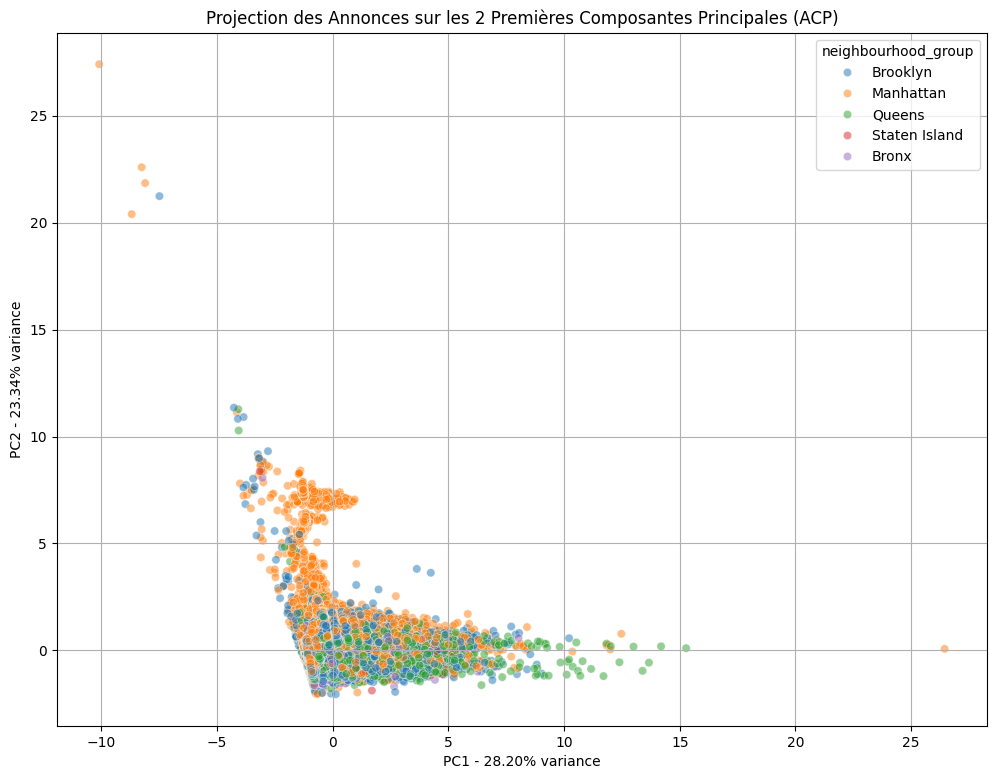

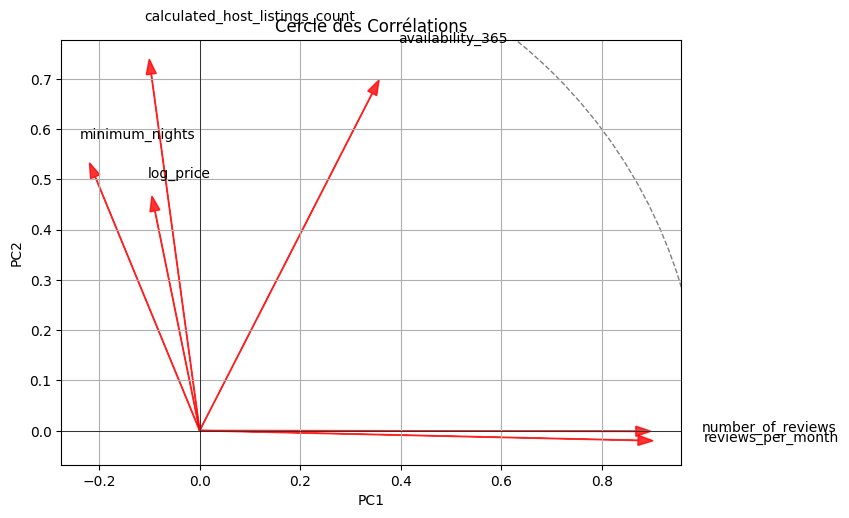


--- Lancement de l'ACM ---


"mca = prince.MCA(n_components=2, n_iter=3, random_state=42)\nmca = mca.fit(df_mca_input)\n\n# CORRECTION #2 : La librairie prince utilise Altair. La syntaxe pour le titre change.\nchart = mca.plot(df_mca_input)\nchart = chart.properties(\n    title='Projection des Modalités sur le Premier Plan Factoriel (ACM)'\n)\nax = mca.plot(df_mca_input)\nplt.show()"

In [4]:
# PARTIE 4 : RÉDUCTION DE DIMENSION (Leçons 3-4-5) - CORRIGÉ #2
print("\n--- Étape 4: Réduction de Dimension ---")

# 1. Analyse en Composantes Principales (ACP) sur les données numériques
print("--- Lancement de l'ACP ---")
features_for_pca = ['log_price', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Centrer et réduire les données est CRUCIAL pour l'ACP
X = df_cleaned[features_for_pca].values
X_scaled = StandardScaler().fit_transform(X)

# Application de l'ACP
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ajout des informations qualitatives pour la visualisation
df_pca.index = df_cleaned.index
df_pca['neighbourhood_group'] = df_cleaned['neighbourhood_group']

# Visualisation des individus sur le premier plan factoriel
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='neighbourhood_group', alpha=0.5)
plt.title('Projection des Annonces sur les 2 Premières Composantes Principales (ACP)')
plt.xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% variance')
plt.ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% variance')
plt.grid(True)
plt.show()

# Cercle des corrélations (Interprétation des axes)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots(figsize=(8, 8))
for i, feature in enumerate(features_for_pca):
    ax.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.8, head_width=0.02)
    ax.text(loadings[i,0]*1.15, loadings[i,1]*1.15, feature, color='black')
circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle des Corrélations')
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
plt.show()

# 2. Analyse des Correspondances Multiples (ACM) sur les données catégorielles
print("\n--- Lancement de l'ACM ---")
df_cleaned['price_category'] = pd.qcut(df_cleaned['price'], q=3, labels=['Bas', 'Moyen', 'Élevé'])
features_for_mca = ['neighbourhood_group', 'room_type', 'price_category']
df_mca_input = df_cleaned[features_for_mca]

'''mca = prince.MCA(n_components=2, n_iter=3, random_state=42)
mca = mca.fit(df_mca_input)

# CORRECTION #2 : La librairie prince utilise Altair. La syntaxe pour le titre change.
chart = mca.plot(df_mca_input)
chart = chart.properties(
    title='Projection des Modalités sur le Premier Plan Factoriel (ACM)'
)
ax = mca.plot(df_mca_input)
plt.show()'''

## Tâche 4: Clustering et segmentation des hôtes

In [5]:
df_cleaned.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,host_type,price_category
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.01,2,Moyen
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.42,1,Élevé
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,5.02,0,Moyen
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.50,0,Moyen
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.39,0,Bas


In [6]:
# --- CLUSTERING KMEANS SUR PCA ---

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Sélection des variables
Num_X = df_cleaned[['log_price', 
                    'minimum_nights', 
                    'number_of_reviews', 
                    'reviews_per_month', 
                    'calculated_host_listings_count', 
                    'availability_365']]
Cat_X = df_cleaned[['neighbourhood_group','room_type']]  # pour interprétation

# 2. Standardisation
scaler = StandardScaler()
Num_X_scaled = scaler.fit_transform(Num_X)

# 3. PCA
pca = PCA(n_components=2)  # 2 composantes principales
X_pca = pca.fit_transform(Num_X_scaled)

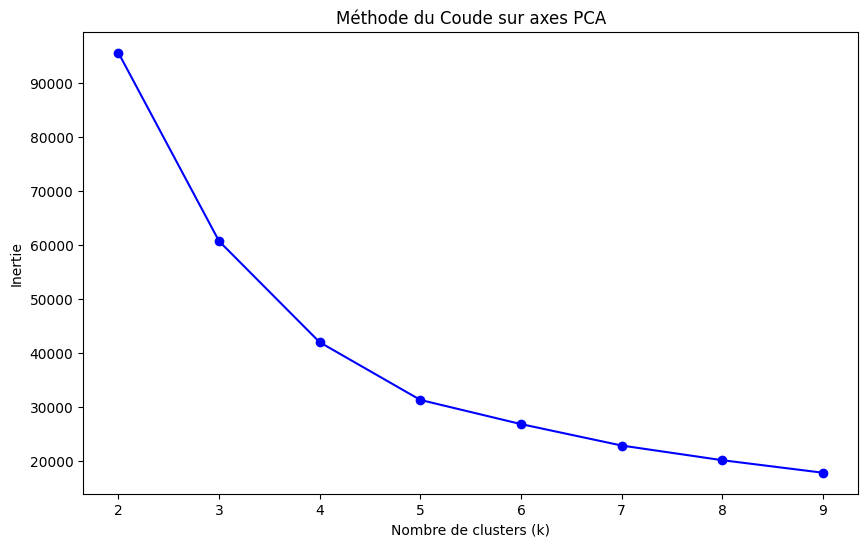

In [7]:
# 4. Méthode du coude pour choisir k
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude sur axes PCA')
plt.show()

In [24]:
# 5. KMeans final
k_opt = 4  # choisir selon le coude
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X_pca)

--- Lancement du K-Means ---


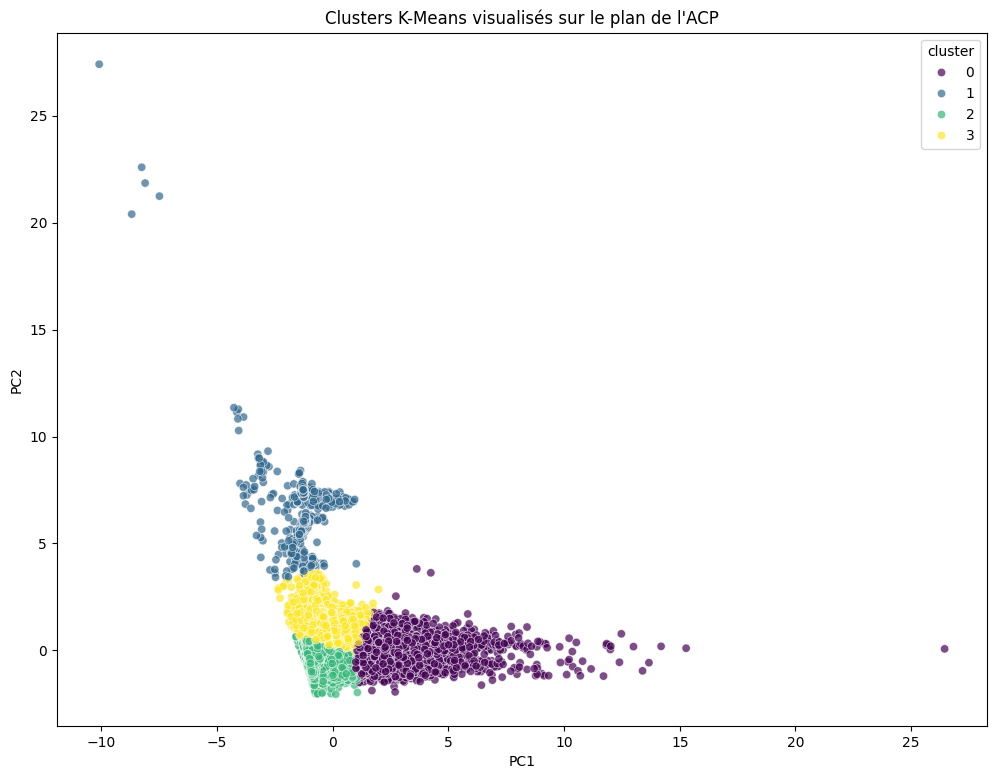

In [25]:
# K-Means sur les composantes principales de l'ACP
print("--- Lancement du K-Means ---")
# On utilise les données de l'ACP pour le clustering
X_for_kmeans = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_for_kmeans['cluster'] = labels
X_for_kmeans['host_type'] = df_cleaned['host_type'].values
plt.figure(figsize=(12, 9))
sns.scatterplot(data=X_for_kmeans, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Clusters K-Means visualisés sur le plan de l\'ACP')
plt.show()

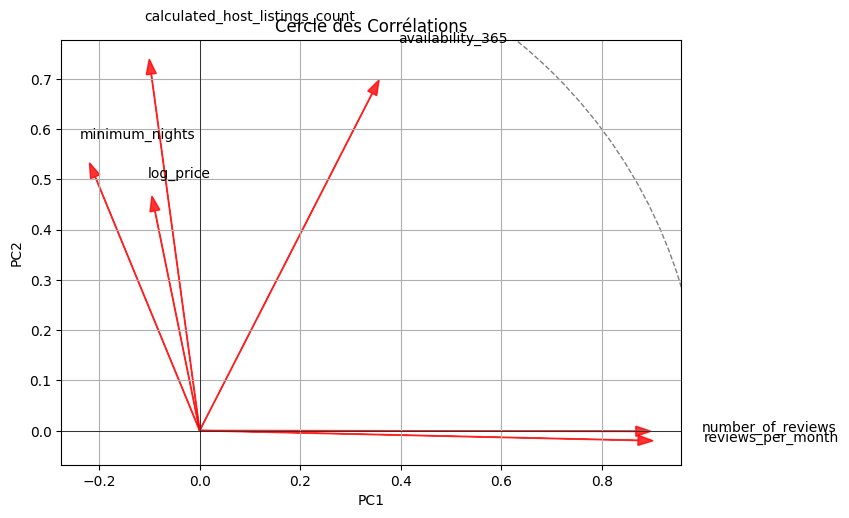

In [10]:
# Circle des corrélations (Interprétation des axes)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots(figsize=(8, 8))
for i, feature in enumerate(Num_X.columns):
	ax.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.8, head_width=0.02)
	ax.text(loadings[i,0]*1.15, loadings[i,1]*1.15, feature, color='black')
circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)
ax.axhline(0, color='black', linewidth=0.5)	
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle des Corrélations')
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
plt.show()

In [33]:
# Création du DataFrame avec clusters et variables pour interprétation
cluster_profile = df_cleaned.copy()
cluster_profile['cluster'] = labels  # labels du KMeans sur PCA
cluster_profile['host_type'] = df_cleaned['host_type']  # pour interprétation

# 1. Profil moyen des variables numériques
print("Profil moyen des clusters (variables numériques) :")
columns = Num_X.columns
display(cluster_profile.groupby('cluster')[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month']].mean())

# 2. Répartition des catégories par cluster (tableaux croisés pour plus de clarté)

# Neighbourhood group
print("\nRépartition du 'neighbourhood_group' par cluster :")
ng_table = pd.crosstab(cluster_profile['cluster'], cluster_profile['neighbourhood_group'], normalize='index') * 100
display(ng_table.round(1))  # % par cluster, arrondi à 1 décimale

# Room type
print("\nRépartition du 'room_type' par cluster :")
rt_table = pd.crosstab(cluster_profile['cluster'], cluster_profile['room_type'], normalize='index') * 100
display(rt_table.round(1))

# Host type
print("\nRépartition du 'host_type' par cluster :")
ht_table = pd.crosstab(cluster_profile['cluster'], cluster_profile['host_type'], normalize='index') * 100
display(ht_table.round(1))

# Prix
print("\nRépartition du 'host_type' par cluster :")
pr_table = pd.crosstab(cluster_profile['cluster'], cluster_profile['price_category'], normalize='index') * 100
display(pr_table.round(1))

Profil moyen des clusters (variables numériques) :


,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month
cluster,,,,,
0,117.097779,2.423283,167.050804,95.216365,3.816423
1,257.386598,64.233247,285.054124,2.868557,0.553570
2,121.316854,4.369496,25.961167,8.082826,0.492796
3,181.411740,12.510396,270.501326,13.525798,0.762573



Répartition du 'neighbourhood_group' par cluster :


neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
cluster,,,,,
0,3.4,42.0,36.2,17.1,1.3
1,0.3,4.4,94.6,0.6,0.1
2,1.9,44.9,42.4,10.3,0.5
3,2.5,34.6,49.6,12.1,1.1



Répartition du 'room_type' par cluster :


room_type,Entire home/apt,Private room,Shared room
cluster,,,
0,47.7,50.1,2.2
1,94.8,5.0,0.1
2,48.3,49.5,2.2
3,59.6,37.3,3.1



Répartition du 'host_type' par cluster :


host_type,0,1,2
cluster,,,
0,54.6,39.3,6.1
1,11.1,2.2,86.7
2,78.7,19.0,2.3
3,46.9,27.9,25.1



Répartition du 'host_type' par cluster :


price_category,Bas,Moyen,Élevé
cluster,,,
0,39.4,39.0,21.6
1,3.6,10.2,86.2
2,39.5,36.6,23.9
3,24.6,29.5,45.9


In [36]:
display(cluster_profile.groupby('host_type')[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month']].mean())

,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month
host_type,,,,,
0,142.312408,5.872101,77.942826,20.550900,0.959435
1,115.242269,5.450282,147.262344,35.500854,1.561987
2,158.320228,18.253012,254.933418,12.901501,0.875365


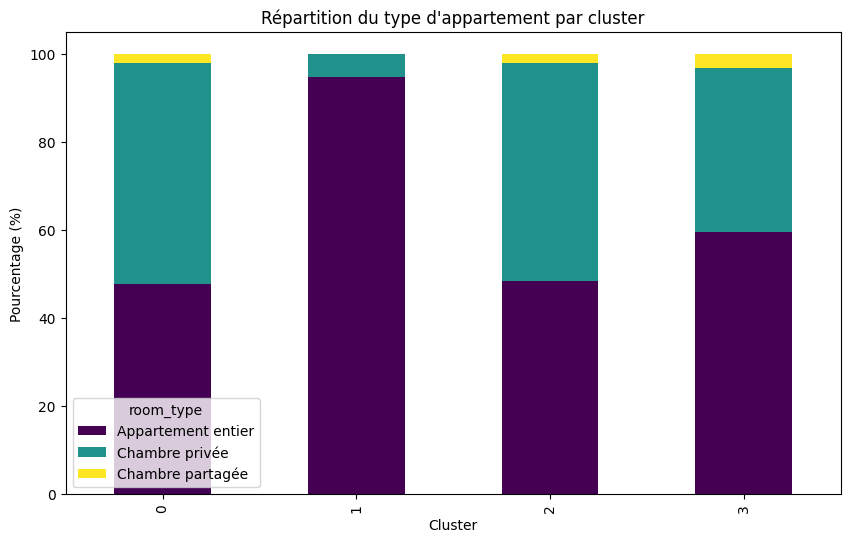

In [12]:
# visualisation des en barres de la repartition des clusters selon host_type des prix et types de chambres
rt_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Répartition du type d'appartement par cluster")
plt.ylabel('Pourcentage (%)')
plt.xlabel('Cluster')
plt.legend(title='room_type', labels=["Appartement entier", "Chambre privée", "Chambre partagée"])
plt.show()

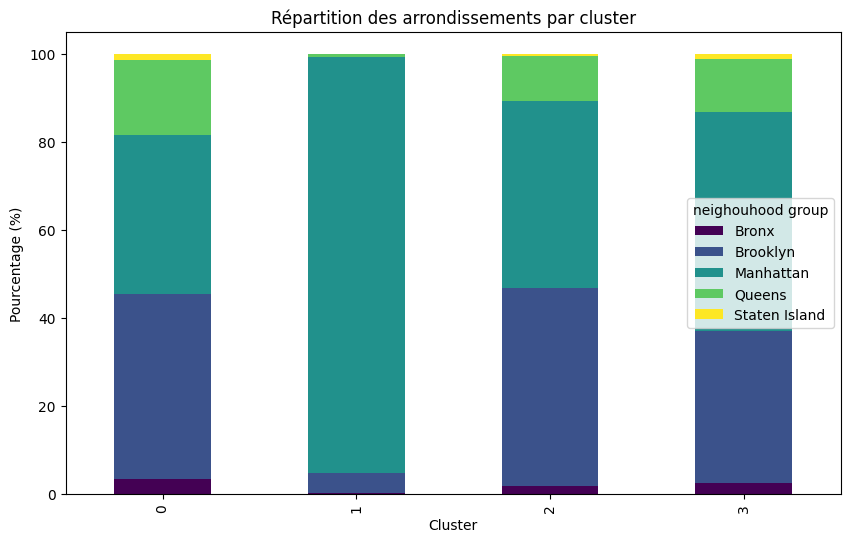

In [13]:
# visualisation des en barres de la repartition des clusters selon host_type des prix et types de chambres
ng_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Répartition des arrondissements par cluster")
plt.ylabel('Pourcentage (%)')
plt.xlabel('Cluster')
plt.legend(title='neighouhood group', labels=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
plt.show()

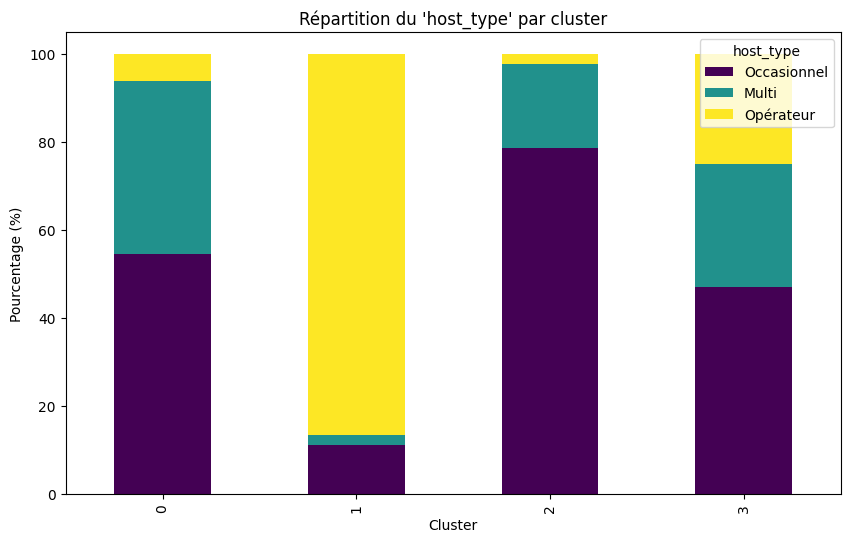

In [14]:
# visualisation des en barres de la repartition des clusters selon host_type des prix et types de chambres
ht_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Répartition du 'host_type' par cluster")
plt.ylabel('Pourcentage (%)')
plt.xlabel('Cluster')
plt.legend(title='host_type', labels=['Occasionnel', 'Multi', 'Opérateur'])
plt.show()

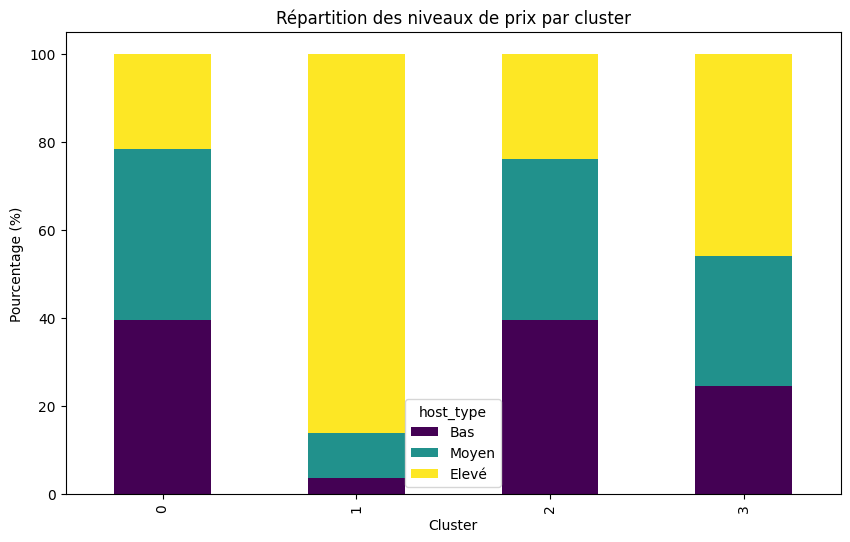

In [15]:
# visualisation des en barres de la repartition des clusters selon host_type des prix et types de chambres
pr_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Répartition des niveaux de prix par cluster")
plt.ylabel('Pourcentage (%)')
plt.xlabel('Cluster')
plt.legend(title='host_type', labels=['Bas', 'Moyen', 'Elevé'])
plt.show()

Interprétation narrative des clusters

Cluster 0 :

Dominé par les hôtes occasionnels, suivi des multi-listings.

Faible présence des opérateurs professionnels.

Prix moyen : intermédiaire.

Profil typique : petits hôtes avec quelques listings.

Cluster 1 :

Entièrement dominé par les opérateurs professionnels.

Prix moyen : plus élevé.

Profil : hôtes professionnels possédant plusieurs logements.

Cluster 2 :

Fortement dominé par les occasionnels (~80%), suivi des multi-listings.

Faible présence des opérateurs.

Prix moyen : bas ou moyen.

Profil : hôtes principalement individuels avec un seul logement.

Cluster 3 :

Dominé par les occasionnels, mais ~25% multi et ~25% opérateurs.

Prix moyen : intermédiaire.

Profil : mélange d’hôtes individuels et professionnels, diversité dans le type de logement et les prix.

In [17]:
# clustering spectral avec kmeans
from sklearn.cluster import SpectralClustering
df_sample = X_for_kmeans.iloc[:30000, :]
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(df_sample)
df_sample['spectral_cluster'] = spectral_labels
df_sample.head()	

,PC1,PC2,cluster,host_type,spectral_cluster
0,-0.059407,1.125530,3,2,2
1,0.494410,1.241530,3,1,2
2,-0.287265,1.085126,3,0,2
3,5.411588,-0.047450,0,0,1
4,-0.833710,-0.706531,2,0,0


In [35]:
# Création du DataFrame avec clusters et variables pour interprétation
cluster_profile = df_cleaned.copy()
cluster_profile['cluster'] = labels  # labels du KMeans sur PCA
cluster_profile['host_type'] = df_cleaned['host_type']  # pour interprétation

# 1. Profil moyen des variables numériques
print("Profil moyen des clusters (variables numériques) :")
display(cluster_profile.groupby('cluster')[Num_X.columns].mean())

# 2. Répartition des catégories par cluster (tableaux croisés pour plus de clarté)

# Neighbourhood group
print("\nRépartition du 'neighbourhood_group' par cluster :")
ng_table = pd.crosstab(cluster_profile['cluster'], cluster_profile['neighbourhood_group'], normalize='index') * 100
display(ng_table.round(1))  # % par cluster, arrondi à 1 décimale

# Room type
print("\nRépartition du 'room_type' par cluster :")
rt_table = pd.crosstab(cluster_profile['cluster'], cluster_profile['room_type'], normalize='index') * 100
display(rt_table.round(1))

# Host type
print("\nRépartition du 'host_type' par cluster :")
ht_table = pd.crosstab(cluster_profile['cluster'], cluster_profile['host_type'], normalize='index') * 100
display(ht_table.round(1))

Profil moyen des clusters (variables numériques) :


,log_price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
cluster,,,,,,
0,4.602975,2.423283,95.216365,3.816423,2.144498,167.050804
1,5.459278,64.233247,2.868557,0.553570,223.391753,285.054124
2,4.620875,4.369496,8.082826,0.492796,1.513792,25.961167
3,4.958378,12.510396,13.525798,0.762573,9.822880,270.501326



Répartition du 'neighbourhood_group' par cluster :


neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
cluster,,,,,
0,3.4,42.0,36.2,17.1,1.3
1,0.3,4.4,94.6,0.6,0.1
2,1.9,44.9,42.4,10.3,0.5
3,2.5,34.6,49.6,12.1,1.1



Répartition du 'room_type' par cluster :


room_type,Entire home/apt,Private room,Shared room
cluster,,,
0,47.7,50.1,2.2
1,94.8,5.0,0.1
2,48.3,49.5,2.2
3,59.6,37.3,3.1



Répartition du 'host_type' par cluster :


host_type,0,1,2
cluster,,,
0,54.6,39.3,6.1
1,11.1,2.2,86.7
2,78.7,19.0,2.3
3,46.9,27.9,25.1



--- Lancement du DBSCAN ---


'Clustering spatial DBSCAN terminé.'

'Nombre de clusters trouvés : 4'

"Nombre de points 'bruit' (outliers) : 1409"

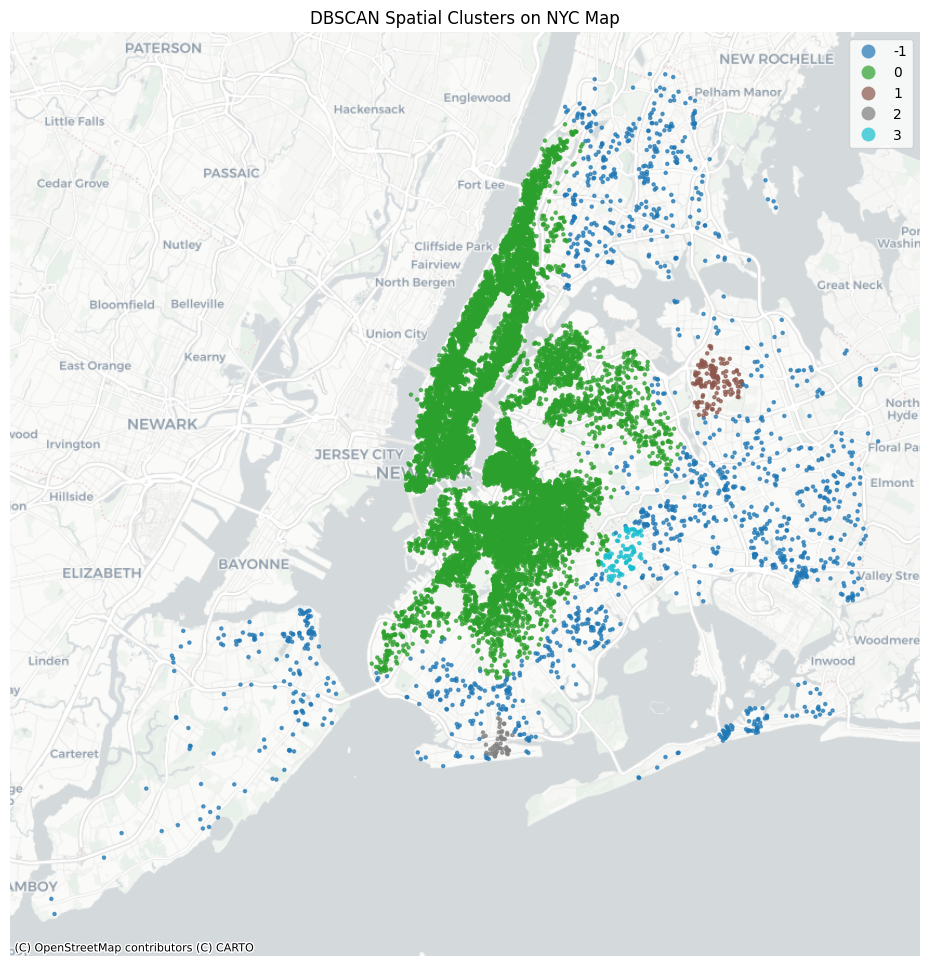

In [ ]:
import geopandas as gpd
import contextily as ctx


# 2. DBSCAN pour le clustering spatial
print("\n--- Lancement du DBSCAN ---")
# On prend un échantillon pour des raisons de performance
df_sample_spatial = df_cleaned.sample(n=20000, random_state=42)
coords = df_sample_spatial[['latitude', 'longitude']].values

# Les paramètres eps et min_samples sont cruciaux et nécessitent des tests.
# eps=0.01 (environ 1km à NYC), min_samples=50
dbscan = DBSCAN(eps=0.01, min_samples=50)
df_sample_spatial['dbscan_cluster'] = dbscan.fit_predict(coords)
display("Clustering spatial DBSCAN terminé.")
display(f"Nombre de clusters trouvés : {df_sample_spatial['dbscan_cluster'].nunique() - 1}")
display(f"Nombre de points 'bruit' (outliers) : {(df_sample_spatial['dbscan_cluster'] == -1).sum()}")

gdf_spatial = gpd.GeoDataFrame(
    df_sample_spatial,
    geometry=gpd.points_from_xy(df_sample_spatial.longitude, df_sample_spatial.latitude),
    crs="EPSG:4326"
).to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf_spatial.plot(
    ax=ax,
    column='dbscan_cluster',
    categorical=True,
    markersize= 5,
    alpha=0.7,
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('DBSCAN Spatial Clusters on NYC Map')
plt.show()

In [ ]:
# Répartition host_type (%)
ht_table = pd.crosstab(df_sample_spatial['dbscan_cluster'], df_cleaned['host_type'], normalize='index')*100
ht_table = ht_table.round(1)
print("\nRépartition du 'host_type' par cluster (%) :")
display(ht_table)


Répartition du 'host_type' par cluster (%) :


host_type,0,1,2
dbscan_cluster,,,
-1,53.2,39.5,7.3
0,67.6,22.6,9.7
1,28.7,41.3,30.1
2,56.0,40.0,4.0
3,35.2,43.2,21.6


Nombre de clusters : 4
Nombre de points 'bruit' (outliers) : 6022

Profil moyen des variables numériques par cluster :


,log_price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
dbscan_cluster,,,,,,
-1,4.793301,16.860844,87.547326,3.339382,22.761707,187.772003
0,4.691406,5.223898,14.501197,0.788373,2.460776,98.231777
1,5.258846,29.724359,1.564103,0.111827,92.685897,313.519231
2,5.707665,30.000000,0.137056,0.028629,232.000000,282.903553
3,5.194158,29.000000,0.188119,0.118515,327.000000,337.960396



Répartition du 'host_type' par cluster (%) :


host_type,0,1,2
dbscan_cluster,,,
-1,47.8,31.7,20.5
0,69.6,23.5,6.9
1,0.0,0.0,100.0
2,0.0,0.0,100.0
3,0.0,0.0,100.0



Répartition du 'neighbourhood_group' par cluster (%) :


neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
dbscan_cluster,,,,,
-1,2.4,33.6,48.6,14.4,0.9
0,2.3,43.0,42.5,11.4,0.8
1,0.0,0.3,99.7,0.0,0.0
2,0.0,1.0,99.0,0.0,0.0
3,0.0,0.0,100.0,0.0,0.0



Prix moyen (log_price) par cluster :


dbscan_cluster
-1    4.79
 0    4.69
 1    5.26
 2    5.71
 3    5.19
Name: log_price, dtype: float64

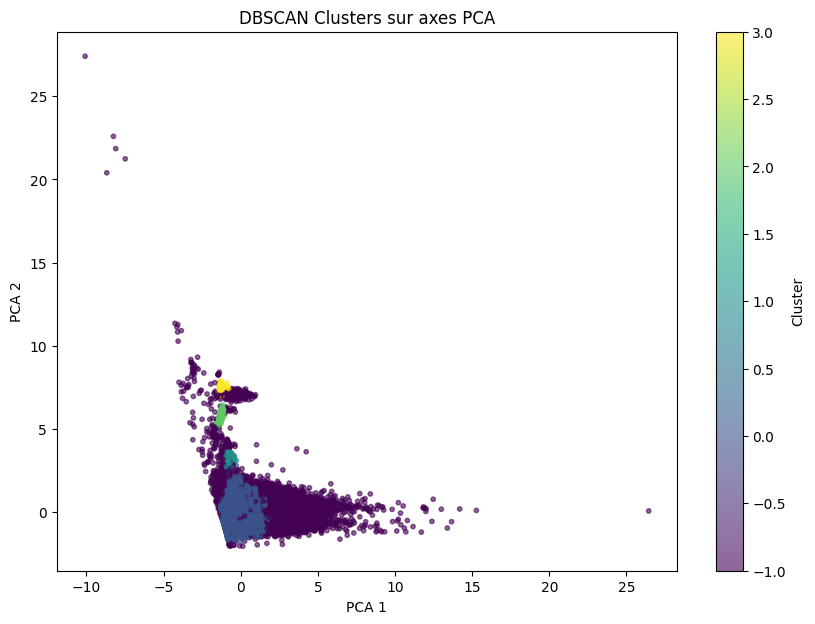

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# --- Prétraitement ---
Num_X = df_cleaned[['log_price', 
                    'minimum_nights', 
                    'number_of_reviews', 
                    'reviews_per_month', 
                    'calculated_host_listings_count', 
                    'availability_365']]
Cat_X = df_cleaned[['host_type','neighbourhood_group']]  # pour interprétation

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Num_X)

# --- DBSCAN ---
# Paramètres à ajuster selon dataset
dbscan = DBSCAN(eps=0.6, min_samples=80)  # eps et min_samples à tester
db_labels = dbscan.fit_predict(X_scaled)

# Ajouter labels au DataFrame
df_cleaned['dbscan_cluster'] = db_labels

# Statistiques de base
num_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
num_noise = (db_labels == -1).sum()
print(f"Nombre de clusters : {num_clusters}")
print(f"Nombre de points 'bruit' (outliers) : {num_noise}")

# --- Analyse des clusters ---
cluster_profile = df_cleaned.copy()

# Moyennes variables numériques
print("\nProfil moyen des variables numériques par cluster :")
display(cluster_profile.groupby('dbscan_cluster')[Num_X.columns].mean())

# Répartition host_type (%)
ht_table = pd.crosstab(cluster_profile['dbscan_cluster'], cluster_profile['host_type'], normalize='index')*100
ht_table = ht_table.round(1)
print("\nRépartition du 'host_type' par cluster (%) :")
display(ht_table)

# Répartition neighbourhood_group (%)
ng_table = pd.crosstab(cluster_profile['dbscan_cluster'], cluster_profile['neighbourhood_group'], normalize='index')*100
ng_table = ng_table.round(1)
print("\nRépartition du 'neighbourhood_group' par cluster (%) :")
display(ng_table)

# Prix moyen par cluster
price_mean = cluster_profile.groupby('dbscan_cluster')['log_price'].mean().round(2)
print("\nPrix moyen (log_price) par cluster :")
display(price_mean)

# --- Visualisation PCA 2D ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='viridis', s=10, alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clusters sur axes PCA')
plt.colorbar(label='Cluster')
plt.show()
